In [1]:
# first of all, the required libraries are imported

import pandas as pd
import numpy as np
from scipy import stats
import xlrd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# the source file is read and the data is shown below:
# there are 365 rows of daily discharge data
# only two columns of discharge at upstream and downstream are imported into the program for simplicity

print (pd.read_excel('hydrodata_pairedttest.xlsx', sheet_name='Sheet2',usecols=[1, 2]))

     Discharge (m3/s) at Samajhighat (US)  Discharge (m3/s) at Jamu (DS)
0                                   101.0                          101.0
1                                   101.0                           99.7
2                                   101.0                           99.7
3                                   100.0                           99.7
4                                    99.8                           99.7
..                                    ...                            ...
360                                 106.0                          118.0
361                                 106.0                          116.0
362                                 106.0                          116.0
363                                 104.0                          115.0
364                                 104.0                          114.0

[365 rows x 2 columns]


In [3]:
# the required sheet and columns are imported
# the descriptive statistics is shown below:

importedsheet=pd.read_excel('hydrodata_pairedttest.xlsx', sheet_name='Sheet2',usecols=[0, 1, 2])
importedsheet.describe()

,Discharge (m3/s) at Samajhighat (US),Discharge (m3/s) at Jamu (DS)
count,365.000000,365.000000
mean,287.692603,299.648493
std,256.813296,261.998415
min,80.900000,71.800000
25%,101.000000,101.000000
50%,163.000000,184.000000
75%,368.000000,409.000000
max,1360.000000,1300.000000


In [4]:
# Ho: The avg discharge at upstream is same as avg discharge at downstream
# H1: The avg discharge at upstream and avg discharge at downstream are significantly different

In [5]:
# the sheet is again imported using another library and command to automatically determine rows number

book=xlrd.open_workbook('hydrodata_pairedttest.xlsx')
sheet=book.sheet_by_name('Sheet2')

In [6]:
# all the discharge values at ustream are stored in an array variable
# the upsteam discharge values are shown below:

us=[sheet.cell_value(r+1,1) for r in range(sheet.nrows-1)]
print(us)

[101.0, 101.0, 101.0, 100.0, 99.8, 98.4, 108.0, 114.0, 112.0, 110.0, 106.0, 104.0, 104.0, 101.0, 99.8, 99.3, 98.4, 98.4, 97.9, 97.0, 95.1, 94.2, 94.2, 94.2, 94.2, 94.2, 94.2, 92.8, 92.8, 94.2, 95.1, 97.0, 93.7, 92.8, 92.8, 92.3, 90.0, 90.5, 91.4, 95.6, 96.1, 96.1, 95.6, 93.3, 92.8, 90.5, 87.4, 87.4, 87.4, 87.4, 87.8, 86.1, 85.2, 82.2, 81.3, 84.4, 90.5, 90.9, 87.8, 87.0, 95.1, 88.7, 86.5, 86.5, 86.5, 85.7, 85.7, 84.8, 87.0, 86.5, 85.2, 85.2, 84.8, 84.8, 84.4, 83.5, 82.6, 82.2, 80.9, 80.9, 80.9, 82.6, 87.8, 87.8, 121.0, 114.0, 97.0, 97.0, 97.0, 96.1, 96.5, 95.6, 95.6, 94.2, 94.2, 94.2, 96.1, 97.5, 97.5, 97.9, 99.3, 104.0, 106.0, 104.0, 108.0, 117.0, 122.0, 131.0, 129.0, 125.0, 125.0, 121.0, 133.0, 150.0, 150.0, 154.0, 152.0, 172.0, 234.0, 247.0, 276.0, 335.0, 300.0, 279.0, 266.0, 256.0, 261.0, 221.0, 218.0, 213.0, 208.0, 190.0, 163.0, 156.0, 155.0, 156.0, 153.0, 158.0, 154.0, 154.0, 151.0, 147.0, 153.0, 143.0, 142.0, 145.0, 183.0, 192.0, 191.0, 206.0, 213.0, 232.0, 223.0, 200.0, 214.0, 2

In [7]:
# the downstream discharge values are stored in an array variable
# the downstream discharge values are shown below:

ds=[sheet.cell_value(r+1,2) for r in range(sheet.nrows-1)]
print(ds)

[101.0, 99.7, 99.7, 99.7, 99.7, 99.7, 100.0, 104.0, 109.0, 107.0, 105.0, 104.0, 103.0, 101.0, 101.0, 100.0, 99.7, 99.7, 99.7, 98.0, 96.9, 96.3, 96.3, 96.3, 96.3, 94.6, 94.6, 94.6, 92.9, 92.9, 91.4, 91.4, 89.8, 88.8, 86.7, 86.7, 86.7, 88.2, 89.3, 91.9, 92.4, 94.0, 92.4, 89.3, 86.7, 85.1, 83.6, 82.0, 82.0, 82.0, 83.6, 80.5, 79.0, 77.4, 76.0, 76.9, 81.0, 87.2, 83.6, 82.0, 85.1, 83.6, 83.6, 82.0, 82.0, 80.5, 79.0, 79.0, 82.6, 80.0, 81.5, 80.0, 79.0, 77.4, 76.9, 76.0, 75.5, 76.0, 74.6, 73.2, 71.8, 75.5, 85.7, 114.0, 140.0, 132.0, 98.6, 93.5, 90.8, 94.0, 92.9, 92.4, 86.7, 86.7, 88.2, 89.8, 89.8, 86.7, 94.0, 95.8, 91.4, 101.0, 105.0, 103.0, 108.0, 113.0, 128.0, 141.0, 140.0, 133.0, 142.0, 132.0, 148.0, 171.0, 174.0, 173.0, 171.0, 183.0, 253.0, 289.0, 240.0, 294.0, 299.0, 275.0, 255.0, 253.0, 243.0, 241.0, 228.0, 190.0, 175.0, 190.0, 165.0, 163.0, 162.0, 154.0, 166.0, 188.0, 178.0, 157.0, 147.0, 140.0, 139.0, 173.0, 178.0, 211.0, 243.0, 211.0, 206.0, 202.0, 206.0, 208.0, 231.0, 211.0, 213.0, 2

In [8]:
# now the upstream and downstream values are used in paired t-test analysis
# the t statistic value is obtained as -6.0448 and p-value is very negligible (3.712*10^-9)

stats.ttest_rel(us,ds)

Ttest_relResult(statistic=-6.0444817969233, pvalue=3.7125841220349075e-09)

In [9]:
# here the p value is much less than the half of alpha value (ie 0.025). so null hypothesis is rejected

In [10]:
#difference between the respective values are calculated

d = np.subtract(us,ds)

<Figure size 432x288 with 0 Axes>

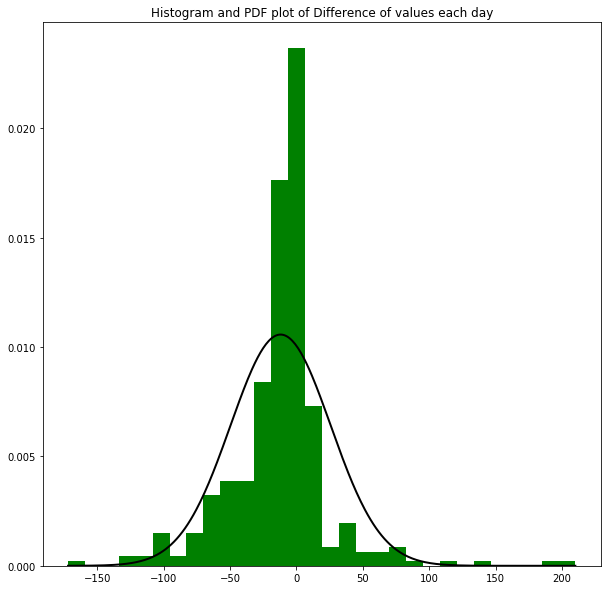

In [11]:
# now plotting histogram of difference

plt.figure()
plt.figure(figsize=(10,10))
plt.hist(d,bins=30,density=True,alpha=1,color='g') #plotting histogram for difference

mu,std = stats.norm.fit(d)

min,max = np.min(d),np.max(d)

x = np.linspace(min,max,365)

p = stats.norm.pdf(x,mu,std)   #creating pdf for difference

# also plotting the gaussian curve

plt.plot(x,p,'k',linewidth=2)

plt.title('Histogram and PDF plot of Difference of values each day')

plt.show()